## Preprocessing Data for scikit-learn

In [220]:
#import numpy and pandas, and DataFrame, numpy and preprocessing
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline


In [235]:
#Reading the file
df_mushrooms = pd.read_csv("C:/Users/KATERINE/Documents/cuny classes/DATA_ACQ_MAN/week13/agaricus-lepiota.data")
df_mushrooms.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [236]:
#Getting the summary of the info from the dataframe
df_mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 23 columns):
p      8123 non-null object
x      8123 non-null object
s      8123 non-null object
n      8123 non-null object
t      8123 non-null object
p.1    8123 non-null object
f      8123 non-null object
c      8123 non-null object
n.1    8123 non-null object
k      8123 non-null object
e      8123 non-null object
e.1    8123 non-null object
s.1    8123 non-null object
s.2    8123 non-null object
w      8123 non-null object
w.1    8123 non-null object
p.2    8123 non-null object
w.2    8123 non-null object
o      8123 non-null object
p.3    8123 non-null object
k.1    8123 non-null object
s.3    8123 non-null object
u      8123 non-null object
dtypes: object(23)
memory usage: 1.4+ MB


In [237]:
#Creating the columns for the dataframe.   Columns' names were taken from the "agaricus-lepiota.names" file
column_names = [
    'class', 'cap shape', 'cap surface', 'cap color', 'bruised', 'odor',
    'gill attachment', 'gill spacing', 'gill size', 'gill color', 
    'stalk shape', 'stalk_root', 'stalk surface above ring',
    'stalk surface below ring', 'stalk color above ring',
    'stalk color below ring', 'veil type', 'veil color', 'ring number',
    'ring type', 'spore print color', 'population', 'habitat'
]

df_mushrooms.columns = column_names

In [238]:
#Printing the first rows of the dataframe
df_mushrooms.head()

,class,cap shape,cap surface,cap color,bruised,odor,gill attachment,gill spacing,gill size,gill color,...,stalk surface below ring,stalk color above ring,stalk color below ring,veil type,veil color,ring number,ring type,spore print color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [239]:
#Counting how many musrooms are edible and how many are poisonous
df_mushrooms['class'].value_counts()

e    4208
p    3915
Name: class, dtype: int64

### 4208 musrooms are edible and 3915 are poisonous


In [240]:
#Finding unique values per column and MISSING (?) values
for col in df_mushrooms.columns.values:
    print(col, df_mushrooms[col].unique())

class ['e' 'p']
cap shape ['x' 'b' 's' 'f' 'k' 'c']
cap surface ['s' 'y' 'f' 'g']
cap color ['y' 'w' 'g' 'n' 'e' 'p' 'b' 'u' 'c' 'r']
bruised ['t' 'f']
odor ['a' 'l' 'p' 'n' 'f' 'c' 'y' 's' 'm']
gill attachment ['f' 'a']
gill spacing ['c' 'w']
gill size ['b' 'n']
gill color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk shape ['e' 't']
stalk_root ['c' 'e' 'b' 'r' '?']
stalk surface above ring ['s' 'f' 'k' 'y']
stalk surface below ring ['s' 'f' 'y' 'k']
stalk color above ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk color below ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil type ['p']
veil color ['w' 'n' 'o' 'y']
ring number ['o' 't' 'n']
ring type ['p' 'e' 'l' 'f' 'n']
spore print color ['n' 'k' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['n' 's' 'a' 'v' 'y' 'c']
habitat ['g' 'm' 'u' 'd' 'p' 'w' 'l']


### The column stalk_root column has some missing values [ '?']

In [241]:
#Getting the total of rows of the dataframe
numOfRows = df_mushrooms.shape[0]
print('Number of Rows in dataframe : ' , numOfRows)

Number of Rows in dataframe :  8123


In [242]:
Rows_missing_values = df_mushrooms[df_mushrooms['stalk_root'] == '?'].shape[0]
Rows_missing_values

2480

Total rows with missing values = 2480

For this homework, missing values are not going to be dropped due to that there are 2480 rows containing ? values.

If 2480 rows are dropped, it wil affect the results of the analisys because it represents around 20% of the dataset.

In [243]:
def label_encode(df_mushrooms, columns):
    for col in columns:
        label_encoder = LabelEncoder()
        unique_values = list(df_mushrooms[col].unique())
        label_encoder_fitted = label_encoder.fit(unique_values)
 
        column_values = list(df_mushrooms[col].values)
        label_encoder.classes_
        column_values_transformed = label_encoder.transform(column_values)
        df_mushrooms[col] = column_values_transformed
 
 
df_mushrooms_ohe = df_mushrooms.copy(deep=True)
to_be_encoded_cols = df_mushrooms_ohe.columns.values
label_encode(df_mushrooms_ohe, to_be_encoded_cols)
df_mushrooms_ohe.head() 

#Code taken from http://ataspinar.com/2017/05/26/classification-with-scikit-learn/  
#The code  has been modified for this homework

,class,cap shape,cap surface,cap color,bruised,odor,gill attachment,gill spacing,gill size,gill color,...,stalk surface below ring,stalk color above ring,stalk color below ring,veil type,veil color,ring number,ring type,spore print color,population,habitat
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1


# Distribution of data

In [296]:
df3=df_mushrooms_ohe.groupby(
   ['gill color', 'spore print color']
).agg(
    {
         'class': "count" 
        ,'gill color':"first"
        ,'spore print color':"first"
    }
)
df3

class  gill color  spore print color
gill color spore print color                                      
0          7                   1728           0                  7
1          7                     96           1                  7
2          1                    432           2                  1
           2                    100           2                  2
           3                    100           2                  3
           5                     24           2                  5
           7                     96           2                  7
3          1                    540           3                  1
           2                     96           3                  2
           3                     96           3                  3
4          2                    203           4                  2
           3                    204           4                  3
5          0                     16           5                  0
           2                    476           5                  2
           3                    508           5                  3
           4                     16           5                  4
           6                     16           5                  6
           8                     16           5                  8
6          0                     16           6                  0
           3                     16           6                  3
           4                     16           6                  4
           8                     16           6                  8
7          1                    540           7                  1
           2                    412           7                  2
           3                    428           7                  3
           6                     16           7                  6
           7                     96           7                  7
8          5                     24           8                  5
9          1                     12           9                  1
           2                    240           9                  2
           3                    240           9                  3
10         1                    108          10                  1
           2                    344          10                  2
           3                    360          10                  3
           5                     24          10                  5
           6                     16          10                  6
           7                    350          10                  7
11         0                     16          11                  0
           3                     16          11                  3
           4                     16          11                  4
           7                     22          11                  7
           8                     16          11                  8

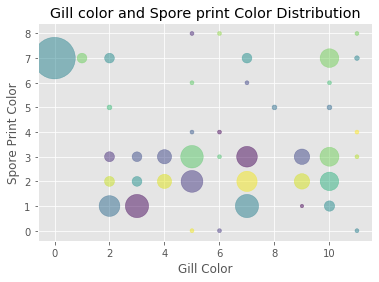

In [312]:
x = df3['gill color']
y = df3['spore print color']
z = df3['class']
colors = np.random.rand(42)
plt.scatter(x, y, s=z, c=colors, alpha=0.5)
plt.title("Gill color and Spore print Color Distribution")
plt.xlabel("Gill Color")
plt.ylabel("Spore Print Color")
plt.show()

In [298]:
df4=df_mushrooms_ohe.groupby(
   ['class', 'odor']
).agg(
    {
         'gill color': "count" 
        ,'class':"first"
        ,'odor':"first"
    }
)
df4

gill color  class  odor
class odor                         
0     0            400      0     0
      3            400      0     3
      5           3408      0     5
1     1            192      1     1
      2           2160      1     2
      4             36      1     4
      5            120      1     5
      6            255      1     6
      7            576      1     7
      8            576      1     8

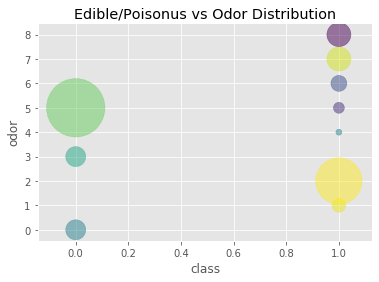

In [300]:
x = df4['class']
y = df4['odor']
z = df4['gill color']
colors = np.random.rand(10)
plt.scatter(x, y, s=z, c=colors, alpha=0.5)
plt.title("Edible/Poisonus vs Odor Distribution")
plt.xlabel("class")
plt.ylabel("odor")
plt.show()

In [311]:
#Getting the odor encode values to be interpreted
lb_make = LabelEncoder()
df_mushrooms["make_code"] = lb_make.fit_transform(df_mushrooms["odor"])
df_mushrooms[["odor", "make_code"]].tail(10)

,odor,make_code
8113,m,4
8114,n,5
8115,s,7
8116,y,8
8117,f,2
8118,n,5
8119,n,5
8120,n,5
8121,y,8
8122,n,5


Based on the graphic, the encoded value 5 is the most edible mushroom.   It means that mushrooms which odor = almond=a = 5, are the most edibles.   
On the other hand, the most poisonous mushrooms are those which odor is 2 = foul=f